# Solutions to Problem Set 3

## Shashank Sule

### Problem 1

In [242]:
function improved_euler_method(f, t0, u0, h, N)
# Integrate u' = f(u) from (t0, u0) using the improved Euler method with stepsize
    # h and N steps
    #First generate the time steps
    
    K = size(u0)[2] #This stores the number of functions we are solving for 
    ts = collect(t0 .+ h*(0:N))
    #Now generate the state vector
    
    us = zeros(size(ts)[1],K) #Each row represents the state of the functions
    #us = hcat(ts,us) #Now the first column in us is going to be the t's and the next columns
                    # are the state vectors
    
#     us_Euler = zeros(size(ts))
    
#     us_Euler[1] = u0
    us[1, :] = u0
    
    for i=1:N
        CurrentState = reshape(us[i,:],(1,K))
        us_Euler = CurrentState .+ h.*g( hcat(ts[i], CurrentState) ) 
        #Just operating on the state space
        
        us[i+1,:] = CurrentState .+ h/2 .* ( g(hcat(ts[i], CurrentState)) .+ g(hcat(ts[i+1],us_Euler)) )
    end
    
    return ts, us
end

improved_euler_method (generic function with 1 method)

In [246]:
g((t,x,y)) = [-t t]

g (generic function with 3 methods)

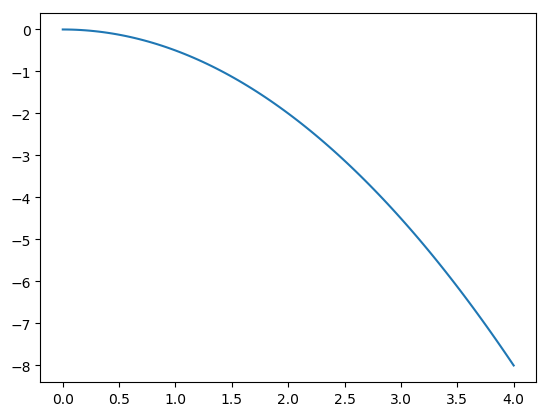

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1452d3d30>

In [250]:
t0 = 0.0;
u0 = [0 0]
h = 0.04;
N = 100;
plot(improved_euler_method(g,t0,u0,h,N)[1],improved_euler_method(g,t0,u0,h,N)[2][:,1])